In [1]:
from timetable import timetable
from passenger import simu
import sys
sys.argv = ['debug.ipynb', 
            '--card_data_path', '../card_info.csv', 
            '--bus_data_path', '../公交数据.xlsx',
            '--road_line_station_setting_path', '../datas/road_line_station_structure_setting.json',
            '--station_distance_rank_path', '../datas/station_pair_distance_rank_index.csv',
            '--id_2_station_path', '../datas/id_2_station.json',
            '--station_2_id_path', '../datas/station_2_id.json']
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--card_data_path',default='./card_info.csv')
parser.add_argument('--bus_data_path',default= './公交数据.xlsx')
parser.add_argument('--road_line_station_setting_path',default= './datas/road_line_station_structure_setting.json')
parser.add_argument('--station_distance_rank_path',default= './datas/station_pair_distance_rank_index.csv')
parser.add_argument('--id_2_station_path',default= './datas/id_2_station.json')
parser.add_argument('--station_2_id_path',default= './datas/station_2_id.json')
myargs = parser.parse_args()
mytime_table = timetable(\
    card_data_path = myargs.card_data_path,\
    bus_data_path = myargs.bus_data_path,\
    road_line_station_setting_path = myargs.road_line_station_setting_path,\
    station_distance_rank_path = myargs.station_distance_rank_path,\
    id_2_station_path = myargs.id_2_station_path,\
    station_2_id_path = myargs.station_2_id_path)
this_simu = simu(\
    mytime_table,\
    card_data_path = myargs.card_data_path,\
    bus_data_path = myargs.bus_data_path,\
    road_line_station_setting_path = myargs.road_line_station_setting_path,\
    station_distance_rank_path = myargs.station_distance_rank_path,\
    id_2_station_path = myargs.id_2_station_path,\
    station_2_id_path = myargs.station_2_id_path,\
    time_accurate = 8,\
    start_hour = 8,\
    start_minute = 23)
total_passenger_nums = []
for i in range(600):
    this_simu.step()
    total_passenger_nums.append(len(this_simu.total_passengers))
    this_simu.observe()
    
import imageio
output_gif = './output.gif'
with imageio.get_writer(output_gif, mode='I', duration=0.1) as writer:
    for filename in this_simu.total_frame:
        image = imageio.imread(filename)
        writer.append_data(image)
        #os.remove(filename)  # Optionally remove the image file after adding to GIF
    

/root/mnt/bus_corr/all_code/timetable.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_1_0929['trip'] = trip_1_0929.\
/root/mnt/bus_corr/all_code/timetable.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.rename(columns = transfer,inplace=True)
/root/mnt/bus_corr/all_code/timetable.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2.rename(columns = t

In [2]:
import pandas as pd
this_simu.now_minute += 1
if this_simu.now_minute == 60:
    this_simu.now_minute = 0
    this_simu.now_hour += 1
if this_simu.now_hour == 24:
    this_simu.now_hour = 0
station_id_list = list(this_simu.id_2_station.keys())#list[str]
now_conditions_df=pd.DataFrame({'this_od_trip_start_station':station_id_list,\
                                        'hour':[this_simu.now_hour]*len(station_id_list),\
                                        'minute_group':[this_simu.now_minute//this_simu.time_accurate]*len(station_id_list)})

In [3]:
now_user_all_possible_route_df = now_conditions_df.merge(\
            this_simu.different_time_user_produce, \
            left_on=['this_od_trip_start_station', 'hour', 'minute_group'],\
            right_on = ['global_station_id','hour','minute_group'], how='left').fillna(0)

/tmp/ipykernel_19929/2998417739.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  right_on = ['global_station_id','hour','minute_group'], how='left').fillna(0)


In [4]:
this_simu.different_time_user_produce_nums

,this_od_trip_start_station,hour,minute_group,count
0,0,5,0,0
1,0,5,1,0
2,0,5,2,0
3,0,5,3,0
4,0,5,4,0
...,...,...,...,...
177531,1448,23,3,0
177532,1448,23,4,0
177533,1448,23,5,0
177534,1448,23,6,0


In [5]:
now_station_routes_and_nums = \
                    now_user_all_possible_route_df.merge(this_simu.different_time_user_produce_nums,\
                                     left_on=['this_od_trip_start_station', 'hour', 'minute_group'],\
                                     right_on = ['this_od_trip_start_station', 'hour', 'minute_group'],\
                                     how='left').fillna(0)

/tmp/ipykernel_19929/3131170115.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  how='left').fillna(0)


In [18]:
import random
import numpy as np
def uniform_sample(x,time_accurate):
    if x['length']!=0:
        #平均流量
        average_nums = int(x['count'])/time_accurate
        actual_nums = np.random.poisson(average_nums)
        return random.choices(x['od_trip'],k=actual_nums)
    else:
        return []

In [20]:
now_station_routes_and_nums['users'] = now_station_routes_and_nums.apply(lambda x:uniform_sample(x,this_simu.time_accurate),axis=1)

In [21]:
now_passengers = []
for row_index in range(len(now_station_routes_and_nums)):
    if len(now_station_routes_and_nums[row_index:row_index+1]['users'].values[0])!=0:
        #print(merged_df[row_index:row_index+1]['users'].values[0])
        start_station = now_station_routes_and_nums[row_index:row_index+1]['this_od_trip_start_station'].values[0]
        start_time = str(this_simu.now_hour)+':'+str(this_simu.now_minute)+':00'
        start_time = pd.to_datetime(start_time, format='%H:%M:%S', errors='coerce').time()
        #start_time = now_station_routes_and_nums[row_index:row_index+1]['minute_group'].values[0]
        for user_instance in now_station_routes_and_nums[row_index:row_index+1]['users'].values[0]:
            now_passengers.append({\
                        'start_station':user_instance['start_station'],\
                        'start_time':start_time,\
                        'target_station':user_instance['end_station'],\
                        'target_line':user_instance['this_line']})
        #根据时间表为每个乘客添加时间表

In [27]:
for user in now_passengers:
    if user['start_station'] < user['target_station'] and this_simu.time_schedule.time_table[user['target_line']] is not None:
        time_df = this_simu.time_schedule.time_table[user['target_line']]
        time_df_column = time_df.loc[:,str(user['start_station'])]
        row_index = time_df_column[time_df_column>=user['start_time']].index.min()
        column_index = time_df.columns.get_loc(str(user['start_station']))
        user['time_table'] = time_df.iloc[row_index,column_index:]
        this_simu.total_passengers.append(user)
    else:
        continue

In [34]:
this_simu.total_passengers

[{'start_station': 6,
  'start_time': datetime.time(8, 24),
  'target_station': 33,
  'target_line': 253,
  'time_table': 6            10:42:35
  7            10:48:48
  8            10:49:57
  9            10:51:44
  10    10:53:43.333333
  11    10:55:42.666667
  12           10:57:42
  13    10:57:44.500000
  14           10:57:47
  15    10:57:49.500000
  16           10:57:52
  17           11:05:34
  18           11:07:13
  19    11:10:26.333333
  20    11:13:39.666667
  21           11:16:53
  22           11:19:18
  23           11:22:18
  24           11:25:18
  25           11:28:18
  26           11:31:01
  27           11:37:54
  28           11:44:47
  29           11:51:40
  30           11:58:33
  31           12:00:57
  32           12:03:12
  33           12:06:13
  34           12:09:14
  35           12:12:34
  36    12:14:41.500000
  37           12:16:49
  38           12:20:13
  39           12:23:37
  40           12:27:01
  41           12:28:39
  42           1

In [50]:
from collections import defaultdict
now_time = str(this_simu.now_hour)+':'+str(this_simu.now_minute+30)+':00'
now_time = pd.to_datetime(now_time, format='%H:%M:%S', errors='coerce').time()
road_section_people_nums = defaultdict(int)
station_people_nums = defaultdict(int)

In [53]:
for user in this_simu.total_passengers:
    if user['time_table'].iloc[-1] is None or user['time_table'].iloc[-1]<now_time:
        print(user)
        this_simu.total_passengers.remove(user)
        continue
    else:
        next_id = None
        for i in range(len(user['time_table'])):
            if user['time_table'].iloc[i]>now_time:
                next_id = i
                break
        if next_id is None:
            #说明已经走完
            this_simu.total_passengers.remove(user)
            continue
        this_line = user['target_line']
        end_station = this_simu.road_line_station_structure_setting[str(this_line)]['all_stations'][next_id]
        if next_id == 0:
            #说明还没开始
            station_people_nums[this_simu.station_2_id[end_station]] +=1
            continue
        #根据当前线路和站点编号来确定路段。
        start_station = this_simu.road_line_station_structure_setting[str(this_line)]['all_stations'][next_id-1]
        road_section = f"{this_simu.station_2_id[start_station]}_{this_simu.station_2_id[end_station]}"
        road_section_people_nums[road_section] +=1
this_simu.road_section_people_nums = road_section_people_nums
this_simu.station_people_nums = station_people_nums

{'start_station': 6, 'start_time': datetime.time(8, 24), 'target_station': 33, 'target_line': 62, 'time_table': 6            08:31:16
7            08:34:04
8            08:34:32
9            08:35:00
10           08:35:28
11    08:36:53.500000
12           08:38:19
13           09:57:59
14           08:39:51
15    08:40:45.500000
16           08:41:40
17    08:42:48.500000
18           08:43:57
19    08:44:53.500000
20           08:45:50
21           08:49:30
22           08:53:10
23           09:45:15
24           08:51:00
25           11:11:38
26    11:02:12.900000
27    10:52:47.800000
28    10:43:22.700000
29    10:33:57.600000
30    10:24:32.500000
31    10:15:07.400000
32    10:05:42.300000
33    09:56:17.200000
34    09:46:52.100000
35           09:37:27
36           09:28:02
37           09:18:37
38           09:09:12
39           08:59:47
40           08:50:22
Name: 16, dtype: object}
{'start_station': 38, 'start_time': datetime.time(8, 24), 'target_station': 48, 'target_line'

In [58]:
this_simu.road_section_people_nums

defaultdict(int,
            {'874_663': 4,
             '933_744': 2,
             '1268_516': 4,
             '280_1011': 3,
             '28_31': 2,
             '659_828': 2,
             '1414_555': 4,
             '368_366': 2,
             '261_263': 2,
             '414_916': 2,
             '1045_1047': 5,
             '196_80': 2,
             '622_38': 2,
             '249_610': 2,
             '1155_263': 4,
             '1158_719': 4,
             '719_720': 8,
             '82_874': 2,
             '216_128': 6,
             '1155_756': 2,
             '798_799': 2,
             '33_28': 4,
             '184_807': 2,
             '1196_424': 2,
             '1148_1009': 2,
             '1414_1414': 6,
             '1063_1262': 3,
             '44_537': 2,
             '460_1277': 4,
             '66_461': 2,
             '1016_208': 6,
             '956_262': 2,
             '987_431': 4,
             '623_354': 6,
             '226_983': 4,
             '1373_1372': 12,


In [59]:
bus_station_dataframe = pd.read_excel(this_simu.bus_data_path,sheet_name='站点数据',header=0,engine='openpyxl')

In [60]:
station_id_position=bus_station_dataframe.groupby('station_name').agg({'longitude':list,'latitude':list}).reset_index()
station_id_position['position'] = station_id_position.apply(lambda x:list(zip(x['latitude'],x['longitude']))[0],axis=1)
station_id_position

,station_name,longitude,latitude,position
0,(招呼站),"[106.5801119, 106.5575612, 106.5576282, 106.58...","[26.59040183, 26.577878, 26.57782781, 26.59018...","(26.59040183, 106.5801119)"
1,113厂小区,"[106.5630178, 106.5632161, 106.5628332, 106.56...","[26.57862194, 26.5785675, 26.57868844, 26.5786...","(26.57862194, 106.5630178)"
2,117地质队,"[106.7688376, 106.7685385, 106.768485, 106.768...","[26.63724226, 26.63684666, 26.6368646, 26.6367...","(26.63724226, 106.7688376)"
3,1958文化园,"[106.7881349, 106.7891719, 106.7874563, 106.78...","[26.53229576, 26.53237993, 26.53225362, 26.532...","(26.53229576, 106.7881349)"
4,501厂宿舍区,"[106.7631462, 106.7625173]","[26.64173251, 26.6401791]","(26.64173251, 106.7631462)"
...,...,...,...,...
1444,龙腾路口,"[106.761795, 106.7620106, 106.7623181, 106.760...","[26.52817184, 26.52666897, 26.5264141, 26.5281...","(26.52817184, 106.761795)"
1445,龙里中学,"[106.9629062, 106.9625878]","[26.46840006, 26.46828237]","(26.46840006, 106.9629062)"
1446,龙里北站,"[106.9628928, 106.9613315]","[26.46844193, 26.46822098]","(26.46844193, 106.9628928)"
1447,龙里经开区,"[106.9944336, 106.9946952]","[26.49421233, 26.49488983]","(26.49421233, 106.9944336)"


In [61]:
station_id_position['station_id'] = station_id_position.apply(lambda x:this_simu.station_2_id[x['station_name']],axis=1)
coords_dict = {row['station_id']: row['position'] for idx, row in station_id_position.iterrows()}
coords_dict

{0: (26.59040183, 106.5801119),
 1: (26.57862194, 106.5630178),
 2: (26.63724226, 106.7688376),
 3: (26.53229576, 106.7881349),
 4: (26.64173251, 106.7631462),
 5: (26.39770667, 106.6573478),
 6: (67.0, 103.0),
 7: (26.64928746, 106.7751496),
 8: (26.50670201, 106.7076703),
 9: (26.55472207, 106.5596473),
 10: (26.49253333, 106.64477),
 11: (26.35832503, 106.4871699),
 12: (26.35774732, 106.4863408),
 13: (26.35787556, 106.4859275),
 14: (26.57886761, 106.7183371),
 15: (26.63982588, 106.7737647),
 16: (26.61413151, 106.7175399),
 17: (26.64282322, 106.7730284),
 18: (26.59463722, 106.6053178),
 19: (26.59022111, 106.6087613),
 20: (26.48590773, 106.8582698),
 21: (26.40331578, 106.6715017),
 22: (26.41342485, 106.6739867),
 23: (26.54473215, 106.6935731),
 24: (26.5295639, 106.6950446),
 25: (26.5674414, 106.7509953),
 26: (26.58506507, 106.6548296),
 27: (26.48664814, 106.802645),
 28: (26.58348101, 106.6672733),
 29: (26.58765656, 106.6669176),
 30: (26.58722693, 106.6670077),
 31: 

In [62]:
def get_color(value, max_value):
    colors = ['#FFEDA0', '#FEB24C', '#FD8D3C', '#FC4E2A', '#E31A1C', '#BD0026', '#800026']
    index = int(min((value / max_value),1) * (len(colors) - 1))
    return colors[index]

In [71]:
import folium
m = folium.Map(location=[26.6, 106.6], zoom_start=12, tiles='CartoDB positron')
max_flow = 100
for station, coord in coords_dict.items():
    folium.CircleMarker(
                location=coord,
                radius=5,  # 增大标记大小
                popup=f'Station {station}',
                tooltip=f'Station {station}',
                color=get_color(station_people_nums[station], max_flow),  # 边框颜色
                fill=True,
                fill_color=get_color(station_people_nums[station], max_flow),  # 填充颜色
                fill_opacity=0.7
                    ).add_to(m)
for route, flow in road_section_people_nums.items():
    start, end = route.split('_')
    start_coord = coords_dict[int(start)]
    end_coord = coords_dict[int(end)]
    folium.PolyLine(
                locations=[start_coord, end_coord],
                weight=10,  # 增加线条宽度
                color=get_color(flow, max_flow),  # 线条颜色
                opacity=0.7  # 透明度
                    ).add_to(m)
m.save(f'heatmap.html')

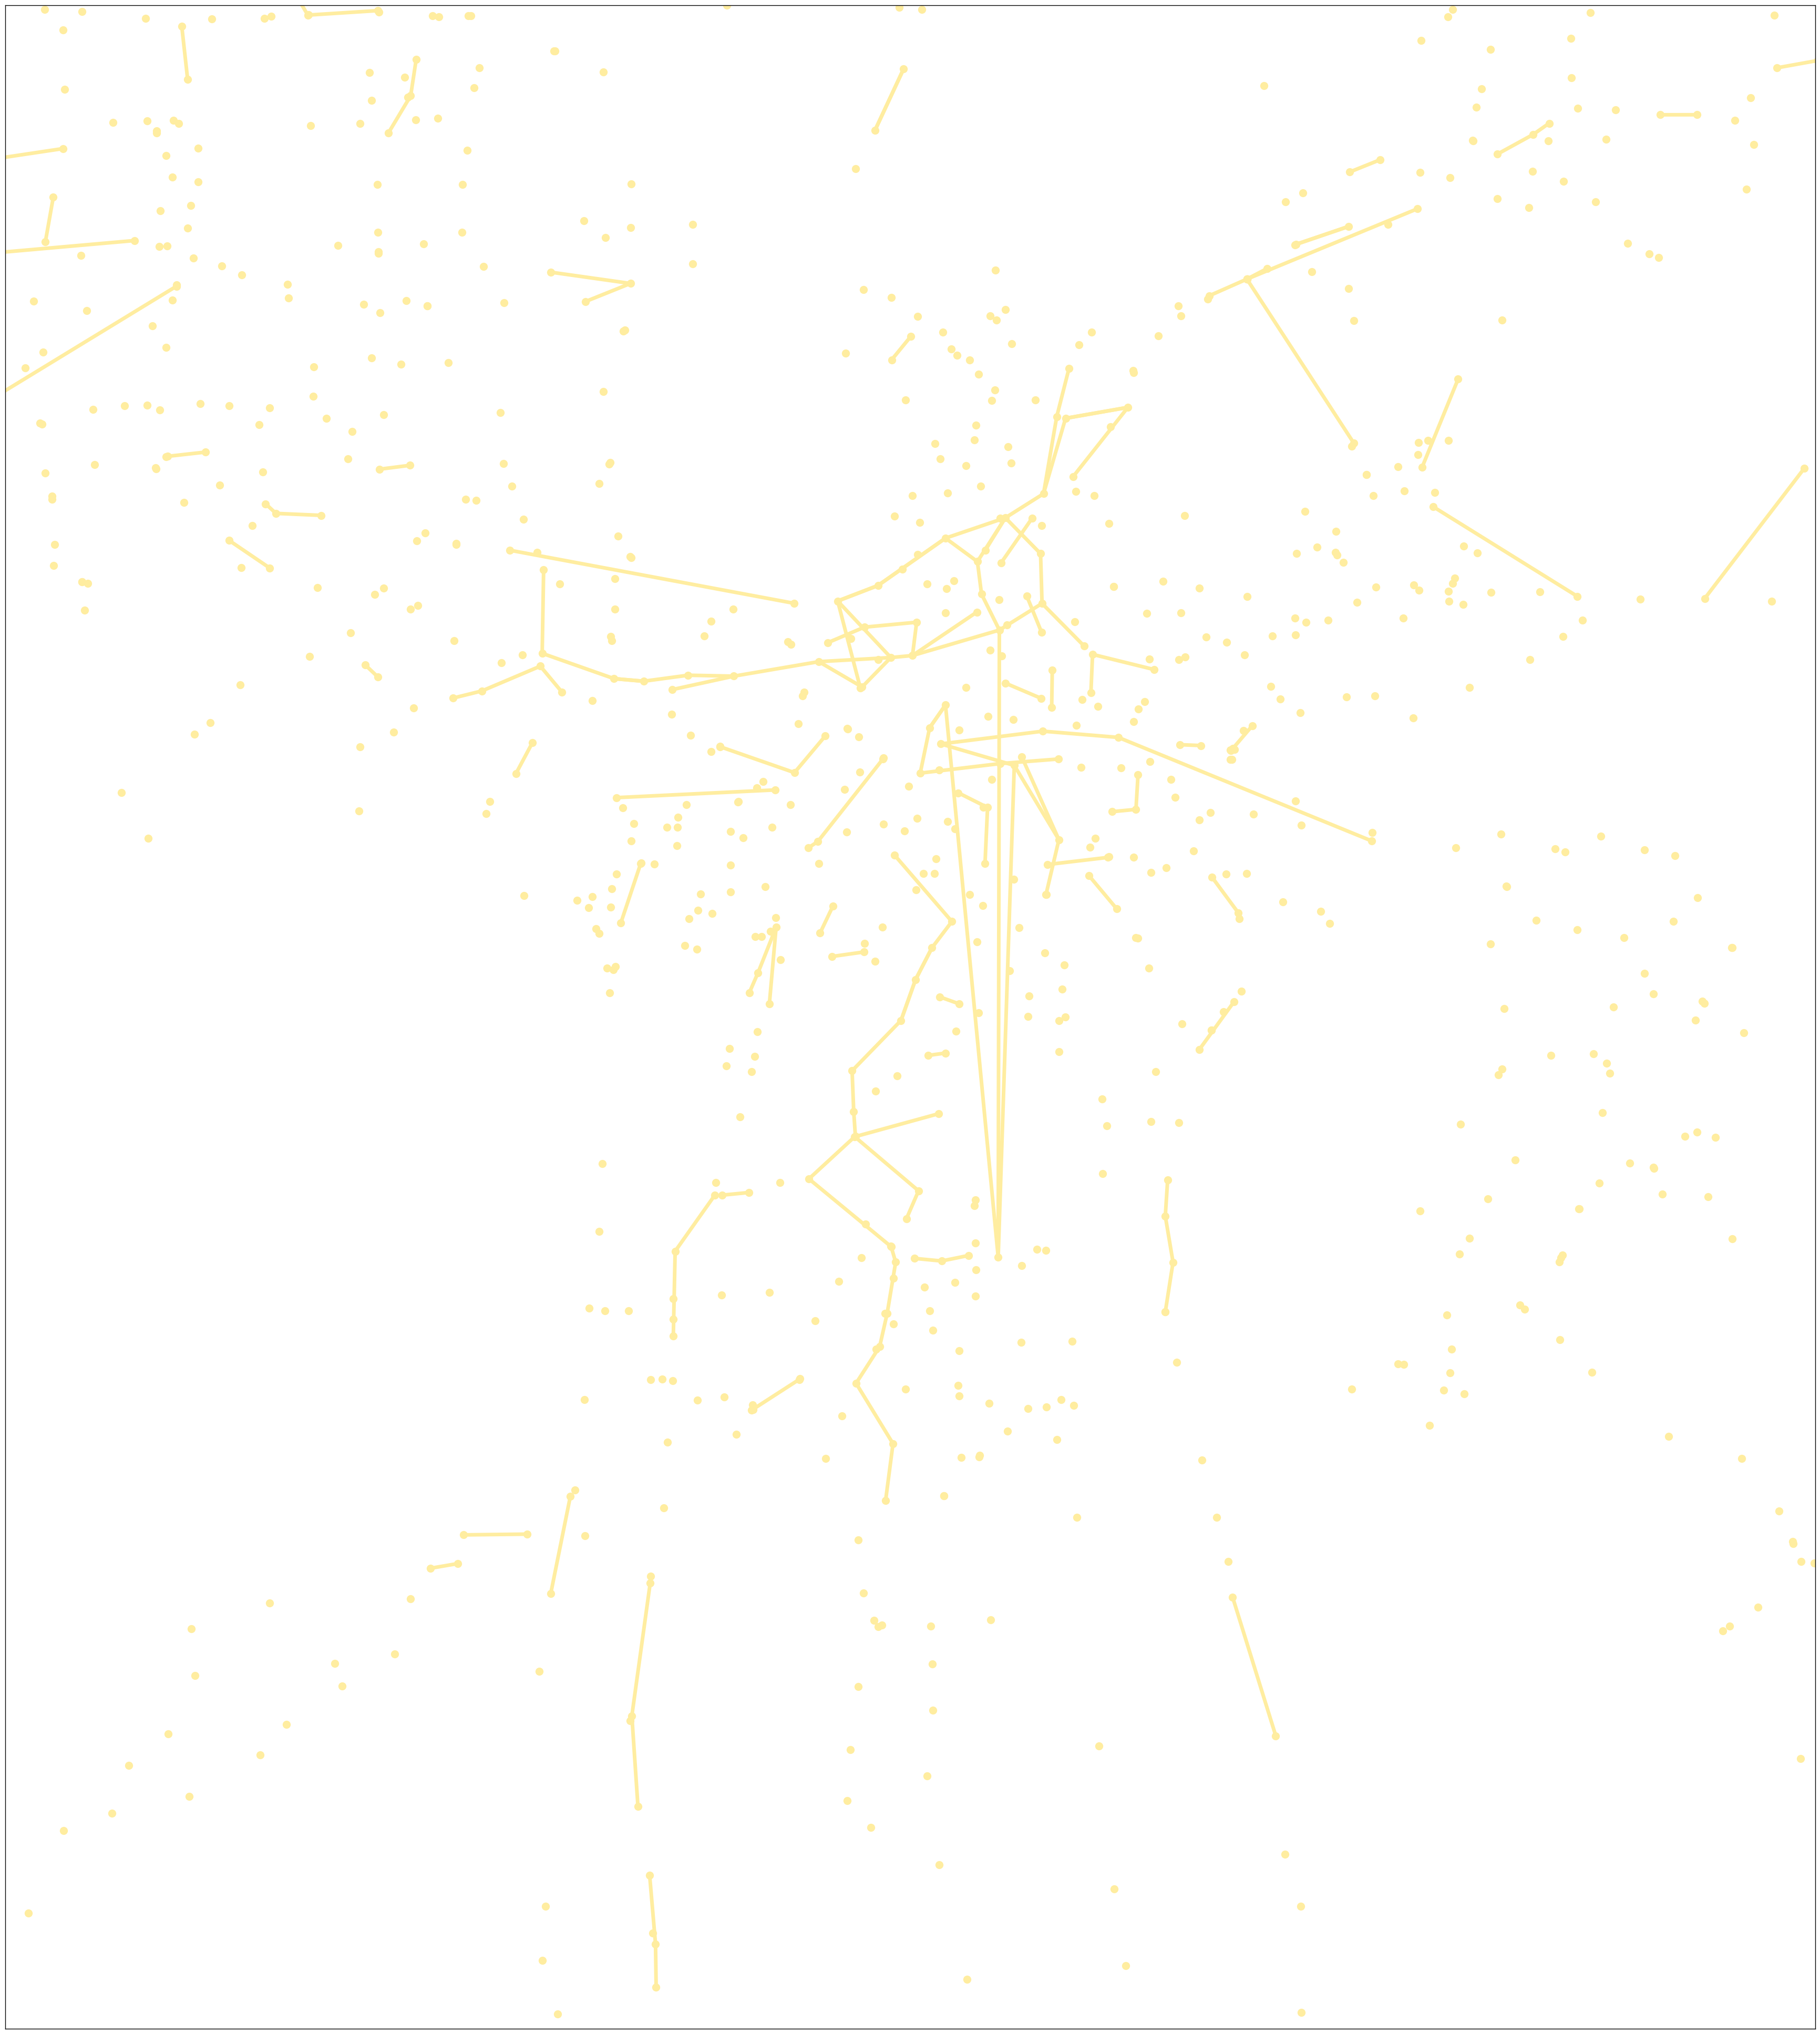

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 创建画布
fig, ax = plt.subplots(figsize=(50, 50))

# 创建Basemap实例
m = Basemap(projection='merc', llcrnrlat=26.45, urcrnrlat=26.65, llcrnrlon=106.60, urcrnrlon=106.80, resolution='i', ax=ax)

# 画出基础地图
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='white', lake_color='aqua')

# 添加站点
for station, coord in coords_dict.items():
    x, y = m(coord[1], coord[0])
    m.plot(x, y, 'o', markersize=10, color=get_color(station_people_nums[station], max_flow), label=f'Station {station}')

# 添加路段
for route, flow in road_section_people_nums.items():
    start, end = map(int, route.split('_'))
    start_coord = coords_dict[start]
    end_coord = coords_dict[end]
    x_start, y_start = m(start_coord[1], start_coord[0])
    x_end, y_end = m(end_coord[1], end_coord[0])
    m.plot([x_start, x_end], [y_start, y_end], color=get_color(flow, max_flow), linewidth=5)

# 保存为PNG图片
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
this_simu.step()
len(this_simu.total_passengers)
this_simu.observe()

/root/mnt/bus_corr/all_code/passenger.py:163: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  right_on = ['global_station_id','hour','minute_group'], how='left').fillna(0)
/root/mnt/bus_corr/all_code/passenger.py:169: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  how='left').fillna(0)


421

In [ ]:
import imageio
import os
output_gif = './output.gif'
with imageio.get_writer(output_gif, mode='I', duration=0.1) as writer:
    for filename in this_simu.total_frame:
        image = imageio.imread(filename)
        writer.append_data(image)
        #os.remove(filename)  # Optionally remove the image file after adding to GIF
    